<a href="https://colab.research.google.com/github/srlucasromulo/Tibia-classifier/blob/main/tibia_classifier_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Aprendizado de Máquina / Artigo SBGames
##### Gabriel Rodrigues Chaves Carneiro
##### João Pedro Mendes de Oliveira
##### Lucas Rômulo de Souza Resende

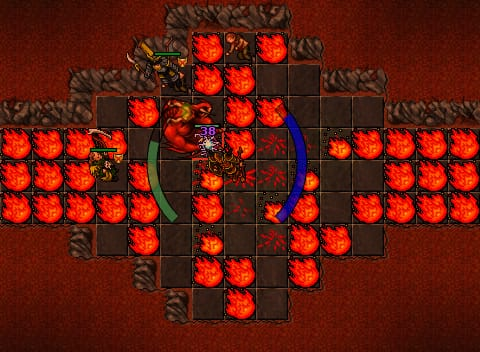

# Importação das bibliotecas básicas

In [ ]:
!pip -q install plotly --upgrade
!pip -q install yellowbrick
import pandas as pd
import numpy as np

     |████████████████████████████████| 15.2 MB 4.2 MB/s 


# Obtenção da base de dados

- Crawler realizado a partir do site: https://tibia.fandom.com/wiki/Main_Page
- Exemplo: https://tibia.fandom.com/wiki/Goblin

# Importação e exibição dos dados

In [ ]:
df = []
df.append(pd.read_csv('https://raw.githubusercontent.com/srlucasromulo/Tibia-classifier/main/output'))                     # orginal
df.append(pd.read_csv('https://raw.githubusercontent.com/srlucasromulo/Tibia-classifier/main/normalized_output'))          # normalized
df.append(pd.read_csv('https://raw.githubusercontent.com/srlucasromulo/Tibia-classifier/main/balanced_output'))            # balanced
df.append(pd.read_csv('https://raw.githubusercontent.com/srlucasromulo/Tibia-classifier/main/balanced_normalized_output')) # balanced and normalized

In [ ]:
# original database
df[0]

,Unnamed: 0,name,difficulty,occurrence,hp,exp,speed,armor,damage,summon,...,fire,energy,earth,illusionable,pushable,pushes,paralysable,sense_invis,walk_around,walk_through
0,0,Acid Blob,3,1,250,250,60,3,160,0,...,110,110,0,0,0,0,1,0,2,1
1,1,Acolyte of Darkness,2,4,325,200,90,19,120,0,...,0,100,0,0,0,0,0,0,1,2
2,2,Acolyte of the Cult,3,1,390,300,100,30,220,0,...,100,110,80,0,0,0,1,1,3,0
3,3,Adept of the Cult,3,1,430,400,95,33,242,0,...,100,105,60,0,0,0,1,1,3,0
4,4,Adult Goanna,4,1,8300,6650,210,84,880,0,...,100,110,75,0,0,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,562,Wyvern,3,1,795,515,93,19,144,0,...,100,80,0,1,0,1,1,1,2,1
563,563,Yeti,3,4,950,460,125,28,555,0,...,110,108,100,0,0,0,1,1,3,0
564,564,Yielothax,3,1,1500,1250,150,32,710,0,...,75,105,0,0,0,1,0,1,1,2
565,565,Young Sea Serpent,3,1,1050,1000,240,20,700,0,...,70,110,0,0,0,1,0,1,0,3


In [ ]:
df[0].describe()

,Unnamed: 0,difficulty,occurrence,hp,exp,speed,armor,damage,summon,convince,...,fire,energy,earth,illusionable,pushable,pushes,paralysable,sense_invis,walk_around,walk_through
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,...,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,283.000000,2.753086,1.366843,2464.959436,1832.014109,123.246914,32.712522,585.114638,0.162257,0.223986,...,78.091711,89.135802,64.888889,0.343915,0.146384,0.511464,0.456790,0.654321,1.781305,0.985891
std,163.823075,0.944981,0.829765,4405.277716,3148.887921,46.989538,26.036402,871.526229,0.369012,0.417281,...,40.875430,26.314775,45.152901,0.475433,0.353803,0.500310,0.498569,0.476009,1.136359,1.056602
min,0.000000,0.000000,1.000000,2.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,...,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,141.500000,2.000000,1.000000,199.000000,92.500000,90.000000,11.000000,90.000000,0.000000,0.000000,...,70.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,283.000000,3.000000,1.000000,720.000000,515.000000,115.000000,29.000000,253.000000,0.000000,0.000000,...,100.000000,100.000000,90.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000
75%,424.500000,3.000000,1.000000,2750.000000,2106.000000,150.000000,45.000000,718.000000,0.000000,0.000000,...,100.000000,100.000000,100.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,2.000000
max,566.000000,5.000000,4.000000,32000.000000,19700.000000,340.000000,200.000000,7100.000000,1.000000,1.000000,...,140.000000,125.000000,125.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000


In [ ]:
# quantidade de instancias de cada classe na base original
df[0]['difficulty'].value_counts()

3    251
2    150
4    108
1     41
0     10
5      7
Name: difficulty, dtype: int64

In [ ]:
# normalized database
df[1]

,Unnamed: 0,difficulty,occurrence,hp,exp,speed,armor,damage,summon,convince,...,fire,energy,earth,illusionable,pushable,pushes,paralysable,sense_invis,walk_around,walk_through
0,0,3,0.000000,0.081193,0.101523,0.368771,0.230,0.070423,0.0,0.0,...,0.854167,0.64,0.00,0.0,0.0,1.0,0.0,1.0,0.666667,0.333333
1,1,2,0.000000,0.011344,0.008122,0.239203,0.075,0.016338,1.0,1.0,...,0.875000,0.84,0.64,1.0,1.0,0.0,1.0,1.0,1.000000,0.000000
2,2,3,0.000000,0.006500,0.009898,0.285714,0.060,0.028169,1.0,1.0,...,0.833333,0.68,0.88,1.0,0.0,1.0,1.0,0.0,1.000000,0.000000
3,3,4,0.000000,0.265579,0.324873,0.401993,0.410,0.169014,0.0,0.0,...,0.750000,0.68,0.80,0.0,0.0,1.0,1.0,1.0,0.000000,1.000000
4,4,3,0.000000,0.020251,0.029442,0.249169,0.350,0.055493,0.0,0.0,...,0.625000,0.88,0.48,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,562,2,0.666667,0.002750,0.002030,0.152824,0.015,0.001972,0.0,0.0,...,0.833333,0.80,0.80,1.0,0.0,1.0,0.0,0.0,1.000000,0.000000
563,563,4,0.000000,0.128071,0.182741,0.534884,0.175,0.332254,0.0,0.0,...,0.416667,0.88,0.88,0.0,0.0,1.0,0.0,1.0,0.666667,0.333333
564,564,3,0.000000,0.017126,0.032995,0.252492,0.185,0.079296,0.0,0.0,...,0.416667,1.00,0.00,1.0,0.0,0.0,0.0,1.0,0.333333,0.666667
565,565,2,0.000000,0.002281,0.002030,0.202658,0.025,0.005634,1.0,1.0,...,0.833333,0.80,0.80,1.0,0.0,1.0,1.0,0.0,1.000000,0.000000


In [ ]:
# balanced database
df[2]

,Unnamed: 0,difficulty,occurrence,hp,exp,speed,armor,damage,summon,convince,...,fire,energy,earth,illusionable,pushable,pushes,paralysable,sense_invis,walk_around,walk_through
0,0,4,2.0,6500.0,6500.0,140.0,58.0,1200.0,0.0,0.0,...,80.0,100.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0
1,1,2,1.0,55.0,25.0,64.0,6.0,14.0,1.0,0.0,...,105.0,100.0,85.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0
2,2,5,1.0,27800.0,19700.0,246.0,106.0,5419.0,0.0,0.0,...,100.0,72.0,109.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
3,3,3,2.0,600.0,580.0,140.0,43.0,60.0,0.0,1.0,...,120.0,100.0,100.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
4,4,4,1.0,7404.0,4934.0,182.0,50.0,2283.0,0.0,0.0,...,0.0,77.0,35.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,1501,1,1.0,17.0,0.0,83.0,1.0,0.0,0.0,0.0,...,100.0,100.0,100.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1502,1502,2,1.0,160.0,60.0,95.0,6.0,80.0,1.0,1.0,...,80.0,100.0,100.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0
1503,1503,4,1.0,8130.0,6376.0,189.0,76.0,2103.0,0.0,0.0,...,63.0,104.0,98.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
1504,1504,5,1.0,27463.0,18713.0,214.0,104.0,3473.0,0.0,0.0,...,112.0,96.0,83.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0


In [ ]:
# balanced and normalized database
df[3]

,Unnamed: 0,difficulty,occurrence,hp,exp,speed,armor,damage,summon,convince,...,fire,energy,earth,illusionable,pushable,pushes,paralysable,sense_invis,walk_around,walk_through
0,0,3,0.333333,0.065567,0.060914,0.269103,0.200,0.097887,0.0,0.0,...,0.416667,0.280,0.960,0.0,0.0,1.0,0.0,0.0,0.333333,0.666667
1,1,4,0.333333,0.130696,0.179289,0.458472,0.285,0.125634,0.0,0.0,...,0.816667,0.792,0.000,0.0,0.0,1.0,0.0,1.0,0.666667,0.333333
2,2,1,0.000000,0.000781,0.000660,0.122924,0.010,0.002535,1.0,1.0,...,0.858333,0.800,0.800,1.0,1.0,0.0,1.0,0.0,1.000000,0.000000
3,3,0,0.000000,0.000000,0.000000,0.401993,0.000,0.000000,0.0,0.0,...,0.833333,0.800,0.800,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000
4,4,3,0.333333,0.115570,0.131980,0.518272,0.265,0.085915,0.0,0.0,...,0.770833,0.840,0.000,0.0,0.0,0.0,1.0,1.0,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,1501,4,0.000000,0.162448,0.172589,0.269103,0.380,0.109859,0.0,0.0,...,0.833333,0.640,0.800,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000
1502,1502,4,0.000000,0.109319,0.089340,0.318937,0.265,0.169014,0.0,0.0,...,0.791667,0.160,0.840,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000
1503,1503,0,0.000000,0.004688,0.000000,0.066445,0.060,0.000000,1.0,1.0,...,0.675000,0.496,0.496,1.0,1.0,0.0,1.0,0.0,1.000000,0.000000
1504,1504,0,0.666667,0.005719,0.000000,0.229236,0.000,0.000000,0.0,0.0,...,0.833333,0.800,0.800,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000


# Classificação

In [ ]:
# PREVISORES
X_tibia = []
X_tibia.append(df[0].iloc[:, 3:].values)
for i in range(3):
  X_tibia.append(df[i+1].iloc[:, 2:].values)

# CLASSE
y_tibia = []
y_tibia.append(df[0].iloc[:, 2].values)
for i in range(3):
  y_tibia.append(df[i+1].iloc[:, 1].values)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

k = 5

naive = []
decision_tree = []
random_forest = []
knn = []
logistic_reg = []
svm = []
neural = []

for i in range(4):
  naive.append(np.mean(cross_val_score(GaussianNB(var_smoothing=pow(10, -10)), X_tibia[i], y_tibia[i], cv=k)))
  decision_tree.append(np.mean(cross_val_score(DecisionTreeClassifier(criterion='entropy'), X_tibia[i], y_tibia[i], cv=k)))
  random_forest.append(np.mean(cross_val_score(RandomForestClassifier(n_estimators=46, criterion='entropy', random_state=0), X_tibia[i], y_tibia[i], cv=k)))
  knn.append(np.mean(cross_val_score(KNeighborsClassifier(p=1, algorithm='ball_tree'), X_tibia[i], y_tibia[i], cv=k)))
  logistic_reg.append(np.mean(cross_val_score(LogisticRegression(random_state=0, solver='newton-cg', C=5), X_tibia[i], y_tibia[i], cv=k)))
  svm.append(np.mean(cross_val_score(SVC(kernel='linear', C=3), X_tibia[i], y_tibia[i], cv=k)))
  neural.append(np.mean(cross_val_score(MLPClassifier(activation='logistic', random_state=0), X_tibia[i], y_tibia[i], cv=k)))

naive, decision_tree, random_forest, knn, logistic_reg, svm, neural

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: St

([0.7830461108523521,
  0.5043471510634995,
  0.8725022551759037,
  0.7755516930320565],
 [0.8853438907002019,
  0.8730166123272785,
  0.9468812567380256,
  0.9435567974301996],
 [0.9136314236919734,
  0.9012420431609998,
  0.9674594618380233,
  0.9648126553871202],
 [0.8766030119546654,
  0.7214252445272474,
  0.9256187982662649,
  0.8373127103914104],
 [0.8747554727526781,
  0.7584847073435802,
  0.9296121097445601,
  0.8300015401201295],
 [0.8606117062567924,
  0.7742741810277908,
  0.9316076653979011,
  0.8446062792897846],
 [0.8571960875640429,
  0.7178388448998604,
  0.8884512992013377,
  0.7895007810609227])

## Visualização das matrizes de confusão

0.9800664451827242

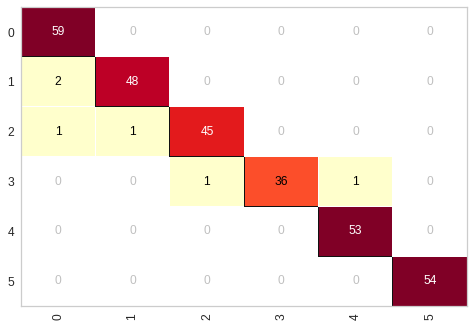

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
RF = RandomForestClassifier(n_estimators=46, criterion='entropy', random_state=0)

data = df[2].drop(columns='Unnamed: 0')

size = len(data)
k = 5

# for i in range(5):
i = 4   # k fold to classify

cm = ConfusionMatrix(RF)

init = i*(int(size/k))
end  = (i+1)*(int(size/k))

test = data.iloc[init:end]
train = pd.concat([data.iloc[0:init], data.iloc[end:]], ignore_index=True)

test_y = test['difficulty']
test_x = test[[c for c in test.columns if c != 'difficulty']]

train_y = train['difficulty']
train_x = train[[c for c in test.columns if c != 'difficulty']]

cm.fit(train_x, train_y)
cm.score(test_x, test_y)

# Arquivos antigos

## Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = []
for i in range(4):
  naive.append(np.mean(cross_val_score(GaussianNB(), X_tibia[i], y_tibia[i], cv=10)))
naive

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


[0.8252506265664161, 0.513095238095238, 0.9335938189845473, 0.827346578366446]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_tibia_teste, previsoes)

0.8169014084507042

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.8169014084507042

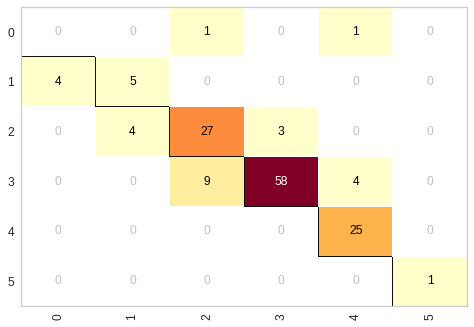

In [ ]:
cm = ConfusionMatrix(naive_tibia_data)
cm.fit(X_tibia_treinamento, y_tibia_treinamento)
cm.score(X_tibia_teste, y_tibia_teste)

In [ ]:
print(classification_report(y_tibia_teste, previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.56      0.56      0.56         9
           2       0.73      0.79      0.76        34
           3       0.95      0.82      0.88        71
           4       0.83      1.00      0.91        25
           5       1.00      1.00      1.00         1

    accuracy                           0.82       142
   macro avg       0.68      0.69      0.68       142
weighted avg       0.84      0.82      0.82       142



## Árvores de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_tibia = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_tibia.fit(X_tibia_treinamento, y_tibia_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_tibia.predict(X_tibia_teste)
previsoes

array([4, 3, 2, 3, 4, 3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 4, 3, 3,
       4, 3, 3, 3, 4, 3, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 3, 2, 4, 3,
       4, 3, 2, 3, 3, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 4, 2, 1, 5, 3, 2, 1,
       3, 3, 3, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 2, 2, 1, 3, 2, 3, 4, 4, 2,
       3, 4, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 4, 3, 3, 2, 3, 4, 3, 1, 1, 3,
       3, 2, 4, 2, 3, 4, 2, 2, 3, 4])

In [ ]:
y_tibia_teste

array([4, 3, 2, 4, 4, 3, 3, 4, 1, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 4, 3, 2,
       4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3,
       4, 3, 2, 3, 3, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 4, 2, 1, 5, 3, 2, 1,
       3, 3, 3, 2, 2, 2, 4, 2, 2, 1, 3, 0, 0, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 2, 1, 3, 2, 3, 4, 4, 2,
       3, 4, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 1, 2, 3,
       3, 2, 4, 2, 3, 4, 2, 2, 3, 4])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_tibia_teste, previsoes)

0.9154929577464789

0.9154929577464789

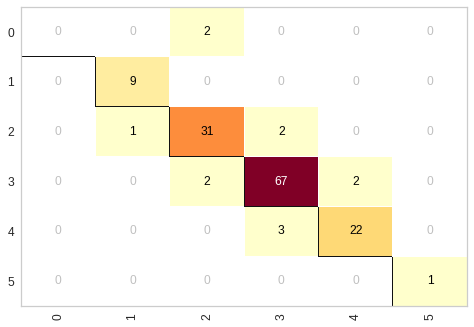

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_tibia)
cm.fit(X_tibia_treinamento, y_tibia_treinamento)
cm.score(X_tibia_teste, y_tibia_teste)

In [ ]:
print(classification_report(y_tibia_teste, previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95         9
           2       0.89      0.91      0.90        34
           3       0.93      0.94      0.94        71
           4       0.92      0.88      0.90        25
           5       1.00      1.00      1.00         1

    accuracy                           0.92       142
   macro avg       0.77      0.79      0.78       142
weighted avg       0.90      0.92      0.91       142



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_tibia = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_tibia.fit(X_tibia_treinamento, y_tibia_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
previsoes = random_forest_tibia.predict(X_tibia_teste)
previsoes

array([4, 3, 2, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 4, 3, 3,
       4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 4, 3,
       4, 3, 2, 3, 3, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 4, 2, 0, 5, 3, 2, 1,
       3, 3, 3, 2, 2, 2, 4, 2, 2, 1, 3, 2, 2, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 2, 1, 3, 2, 3, 4, 4, 2,
       3, 4, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 1, 2, 3,
       3, 2, 4, 2, 3, 4, 2, 2, 3, 4])

In [ ]:
y_tibia_teste

array([4, 3, 2, 4, 4, 3, 3, 4, 1, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 4, 3, 2,
       4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3,
       4, 3, 2, 3, 3, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 4, 2, 1, 5, 3, 2, 1,
       3, 3, 3, 2, 2, 2, 4, 2, 2, 1, 3, 0, 0, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 2, 1, 3, 2, 3, 4, 4, 2,
       3, 4, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 1, 2, 3,
       3, 2, 4, 2, 3, 4, 2, 2, 3, 4])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_tibia_teste, previsoes)

0.9366197183098591

0.9366197183098591

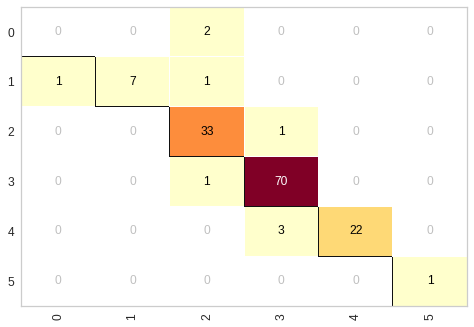

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_tibia)
cm.fit(X_tibia_treinamento, y_tibia_treinamento)
cm.score(X_tibia_teste, y_tibia_teste)

In [ ]:
print(classification_report(y_tibia_teste, previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.78      0.88         9
           2       0.89      0.97      0.93        34
           3       0.95      0.99      0.97        71
           4       1.00      0.88      0.94        25
           5       1.00      1.00      1.00         1

    accuracy                           0.94       142
   macro avg       0.81      0.77      0.78       142
weighted avg       0.93      0.94      0.93       142



## Aprendizagem baseada em instâncias - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_tibia = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_tibia.fit(X_tibia_treinamento, y_tibia_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_tibia.predict(X_tibia_teste)
previsoes

array([4, 3, 2, 4, 4, 3, 3, 4, 2, 3, 3, 3, 3, 1, 2, 3, 4, 2, 1, 4, 3, 2,
       4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 4, 3,
       4, 3, 2, 3, 2, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 3, 2, 1, 5, 3, 2, 1,
       3, 3, 3, 2, 2, 1, 4, 2, 2, 1, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 2, 1, 3, 2, 3, 4, 3, 2,
       3, 4, 3, 2, 2, 4, 4, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 2, 1, 3,
       3, 2, 4, 2, 3, 4, 2, 2, 2, 4])

In [ ]:
y_tibia_teste

array([4, 3, 2, 4, 4, 3, 3, 4, 1, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 4, 3, 2,
       4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3,
       4, 3, 2, 3, 3, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 4, 2, 1, 5, 3, 2, 1,
       3, 3, 3, 2, 2, 2, 4, 2, 2, 1, 3, 0, 0, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 2, 1, 3, 2, 3, 4, 4, 2,
       3, 4, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 1, 2, 3,
       3, 2, 4, 2, 3, 4, 2, 2, 3, 4])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_tibia_teste, previsoes)

0.8873239436619719

0.8873239436619719

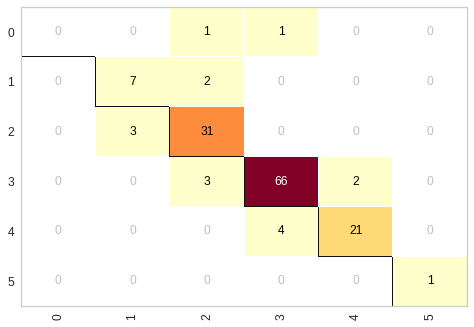

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_tibia)
cm.fit(X_tibia_treinamento, y_tibia_treinamento)
cm.score(X_tibia_teste, y_tibia_teste)

In [ ]:
print(classification_report(y_tibia_teste, previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.70      0.78      0.74         9
           2       0.84      0.91      0.87        34
           3       0.93      0.93      0.93        71
           4       0.91      0.84      0.87        25
           5       1.00      1.00      1.00         1

    accuracy                           0.89       142
   macro avg       0.73      0.74      0.74       142
weighted avg       0.88      0.89      0.88       142



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_tibia = LogisticRegression(random_state=0)
logistic_tibia.fit(X_tibia_treinamento, y_tibia_treinamento)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
previsoes = logistic_tibia.predict(X_tibia_teste)
previsoes

array([4, 3, 2, 4, 4, 3, 3, 4, 2, 3, 3, 3, 3, 1, 2, 3, 4, 2, 1, 4, 3, 3,
       4, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3,
       4, 3, 2, 3, 3, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 3, 2, 1, 4, 3, 2, 1,
       3, 3, 3, 2, 2, 1, 4, 2, 2, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 2, 1, 3, 2, 3, 4, 3, 2,
       3, 4, 3, 2, 2, 4, 4, 3, 3, 2, 3, 3, 4, 3, 3, 2, 3, 4, 3, 2, 2, 3,
       3, 2, 4, 3, 3, 4, 2, 3, 2, 4])

In [ ]:
y_tibia_teste

array([4, 3, 2, 4, 4, 3, 3, 4, 1, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 4, 3, 2,
       4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3,
       4, 3, 2, 3, 3, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 4, 2, 1, 5, 3, 2, 1,
       3, 3, 3, 2, 2, 2, 4, 2, 2, 1, 3, 0, 0, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 2, 1, 3, 2, 3, 4, 4, 2,
       3, 4, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 1, 2, 3,
       3, 2, 4, 2, 3, 4, 2, 2, 3, 4])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_tibia_teste, previsoes)

0.852112676056338

0.852112676056338

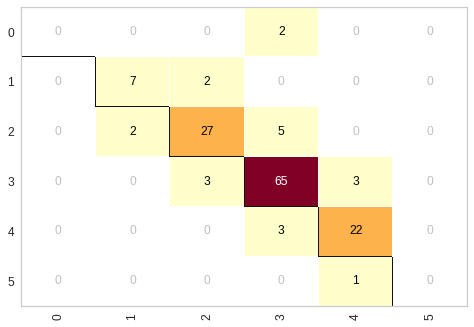

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_tibia)
cm.fit(X_tibia_treinamento, y_tibia_treinamento)
cm.score(X_tibia_teste, y_tibia_teste)

In [ ]:
print(classification_report(y_tibia_teste, previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.78      0.78      0.78         9
           2       0.84      0.79      0.82        34
           3       0.87      0.92      0.89        71
           4       0.85      0.88      0.86        25
           5       0.00      0.00      0.00         1

    accuracy                           0.85       142
   macro avg       0.56      0.56      0.56       142
weighted avg       0.83      0.85      0.84       142



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_tibia = SVC(kernel='rbf', random_state=0, C = 2)
svm_tibia.fit(X_tibia_treinamento, y_tibia_treinamento)

SVC(C=2, random_state=0)

In [ ]:
previsoes = svm_tibia.predict(X_tibia_teste)
previsoes

array([4, 3, 2, 4, 4, 3, 2, 4, 2, 3, 3, 3, 3, 2, 2, 3, 4, 2, 2, 4, 3, 2,
       4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 2, 2, 4, 3,
       4, 3, 2, 3, 2, 3, 4, 4, 4, 2, 2, 3, 2, 3, 3, 3, 2, 2, 5, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 3, 2,
       3, 4, 3, 2, 2, 4, 4, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 2, 2, 3,
       3, 2, 4, 2, 3, 4, 2, 2, 2, 4])

In [ ]:
y_tibia_teste

array([4, 3, 2, 4, 4, 3, 3, 4, 1, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 4, 3, 2,
       4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3,
       4, 3, 2, 3, 3, 3, 4, 4, 4, 1, 2, 3, 2, 3, 3, 4, 2, 1, 5, 3, 2, 1,
       3, 3, 3, 2, 2, 2, 4, 2, 2, 1, 3, 0, 0, 3, 3, 4, 3, 3, 3, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 2, 3, 2, 1, 3, 2, 3, 4, 4, 2,
       3, 4, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3, 1, 2, 3,
       3, 2, 4, 2, 3, 4, 2, 2, 3, 4])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_tibia_teste, previsoes)

0.8028169014084507

0.8028169014084507

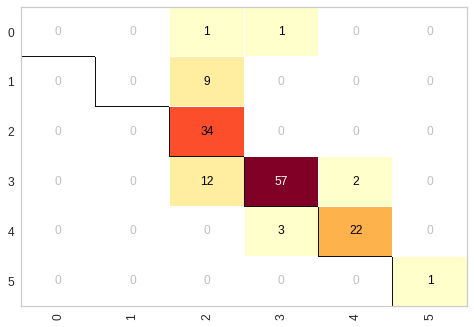

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_tibia)
cm.fit(X_tibia_treinamento, y_tibia_treinamento)
cm.score(X_tibia_teste, y_tibia_teste)

In [ ]:
print(classification_report(y_tibia_teste, previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         9
           2       0.61      1.00      0.76        34
           3       0.93      0.80      0.86        71
           4       0.92      0.88      0.90        25
           5       1.00      1.00      1.00         1

    accuracy                           0.80       142
   macro avg       0.58      0.61      0.59       142
weighted avg       0.78      0.80      0.78       142



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Redes neurais artificiais

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
rede_neural_tibia = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20), random_state = 0)
rede_neural_tibia.fit(X_tibia_treinamento, y_tibia_treinamento)

NameError: ignored

In [ ]:
previsoes = rede_neural_tibia.predict(X_tibia_teste)
previsoes

In [ ]:
y_tibia_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_tibia_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_tibia)
cm.fit(X_tibia_treinamento, y_tibia_treinamento)
cm.score(X_tibia_teste, y_tibia_teste)

In [ ]:
print(classification_report(y_tibia_teste, previsoes))